### Aim of the Study:
The objective of this study is to understand and predict the number of bike rentals (`cnt`) based on various factors such as temperature, weather, and day of the week, by performing data cleaning, exploration, and predictive modeling.

### Data Understanding:

#### Dataset Overview:
The dataset used (`day.csv`) contains data related to bike rentals. The goal is to understand the variables influencing bike rentals.  
The dataset includes columns like `season`, `weathersit`, `temp`, `hum`, `windspeed`, `cnt`, and others, which represent environmental conditions and other factors affecting bike rentals.

#### Data Dictionary:
- **Target Variable:** `cnt` (Number of bike rentals)
- **Features:** 
  - `temp` (Temperature)
  - `atemp` (Apparent temperature)
  - `hum` (Humidity)
  - `windspeed` (Wind speed)
  - Time-related columns such as `season`, `yr` (Year), `mnth` (Month), `weekday` (Day of the week), etc.

### Data Cleaning and Manipulation:

#### Missing Values:
The code checks for missing values in the dataset and identifies any columns with missing data.

#### Drop Irrelevant Columns:
Columns such as `instant`, `dteday`, `casual`, and `registered` are dropped since they are not necessary for the analysis.

#### Data Type Conversion:
Categorical variables such as `season`, `weathersit`, `yr`, `mnth`, `weekday`, `holiday`, and `workingday` are converted to `category` type to optimize memory usage and prepare for encoding.

#### Outliers and Data Cleanup:
Although not explicitly shown in the code, it would be essential to remove or handle outliers, especially for continuous variables like `cnt`, `temp`, `hum`, etc.

### Data Analysis:

#### Univariate Analysis:
The distribution of the target variable (`cnt`) is visualized using a histogram to understand its spread and range.  
A boxplot is also used to detect potential outliers in the distribution of the target variable.

#### Bivariate Analysis:
A correlation heatmap is plotted to visualize relationships between numerical variables.  
Pairplots are created for key variables (`temp`, `atemp`, `hum`, `windspeed`, `cnt`) to visualize the pairwise relationships and distributions.

#### Correlation Analysis:
A heatmap is displayed to show correlations between numerical features, helping identify which variables are strongly related to bike rentals.

#### Feature Encoding:
Categorical variables are one-hot encoded using `pd.get_dummies()`. This step converts categorical columns into binary variables, making them suitable for machine learning models.

### Modeling and Predictions:

#### Train-Test Split:
The dataset is split into training (80%) and testing (20%) sets using `train_test_split`, ensuring that the model is evaluated on unseen data.

#### Feature Scaling:
Numerical features are standardized using `StandardScaler` to ensure that the model treats all features equally, especially when features have different scales.

#### Model Training:
A **Linear Regression** model is trained using the scaled features. The model aims to predict the number of bike rentals (`cnt`) based on the features.

#### Model Evaluation:
- **Performance Metrics:** The model is evaluated using metrics like **R-squared**, **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)**, and **Root Mean Squared Error (RMSE)** to understand how well the model predicts the target variable.

#### Residual Analysis:
The residuals (differences between actual and predicted values) are plotted to check for patterns or biases in the predictions. This helps assess whether the model is appropriate for the data.

### Presentation & Recommendations:

#### Visualizations:
Various visualizations (histograms, boxplots, correlation heatmaps, pairplots) provide insights into data distribution and relationships, aiding in better understanding of the factors influencing bike rentals.

#### Model Insights:
Based on the model performance metrics, the aim would be to discuss potential improvements, alternative models, and any features that could be added to improve predictions.


#### Import Neccessary Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#### Load dataset

In [13]:
df = pd.read_csv('day.csv')

#### Display basic information

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Check for missing values

In [17]:
print("Missing Values per Column:")
print(df.isnull().sum())

Missing Values per Column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### Statistical summary

In [19]:
print("Statistical Summary:")
print(df.describe())

Statistical Summary:
          instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std   

#### Drop irrelevant columns

In [21]:
df.drop(columns=['instant', 'dteday', 'casual', 'registered'], inplace=True)

#### Convert categorical columns to category type

In [23]:
df['season'] = df['season'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')
df['yr'] = df['yr'].astype('category')
df['mnth'] = df['mnth'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')

#### Visualizing target variable

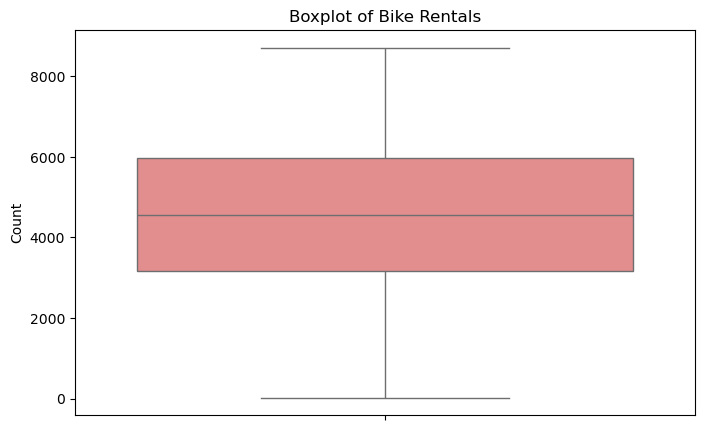

In [69]:
plt.figure(figsize=(8,5))
sns.boxplot(y=df['cnt'], color='lightcoral')
plt.title("Boxplot of Bike Rentals")
plt.ylabel("Count")
plt.show()

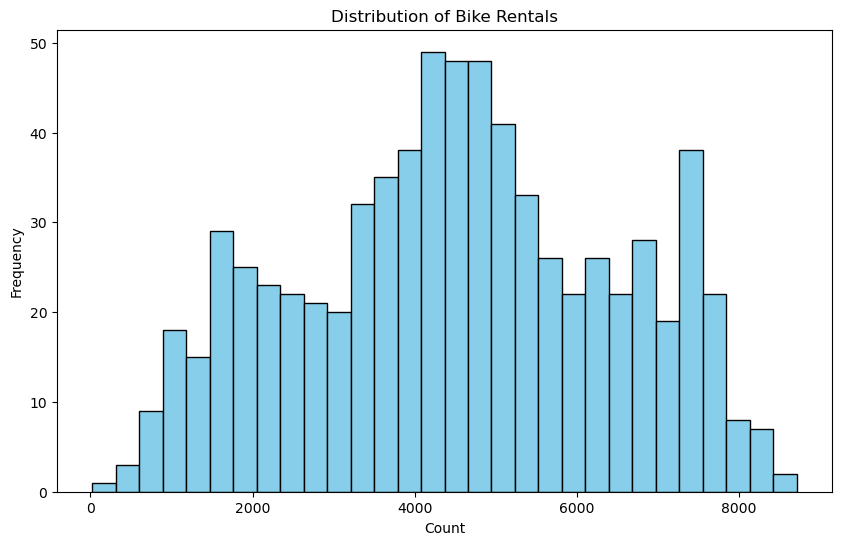

In [78]:
plt.figure(figsize=(10,6))
df['cnt'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Bike Rentals")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.grid()
plt.show()

#### Correlation heatmap

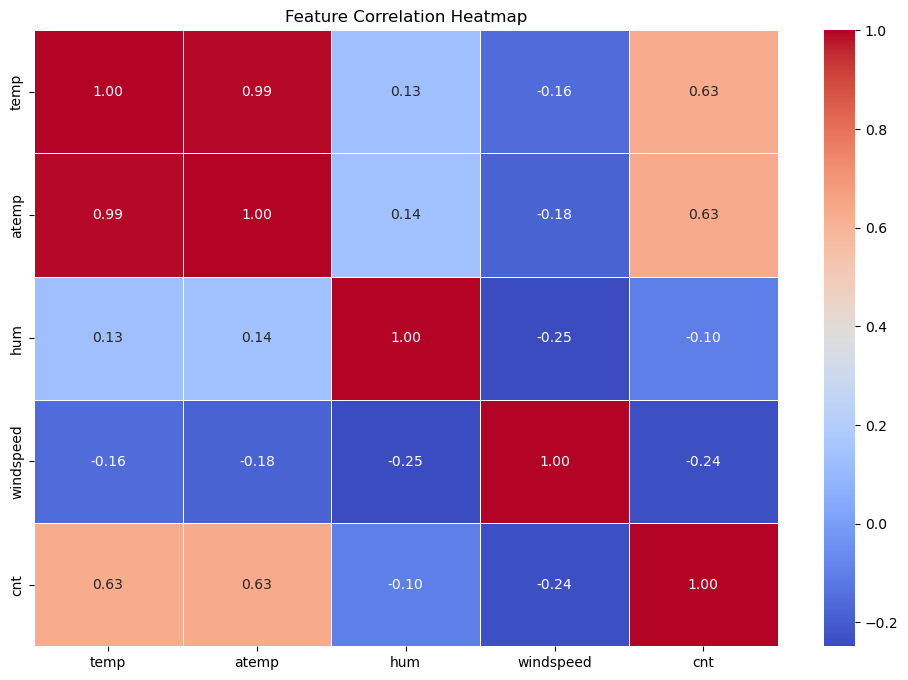

In [80]:
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


#### Pairplot of numerical variables

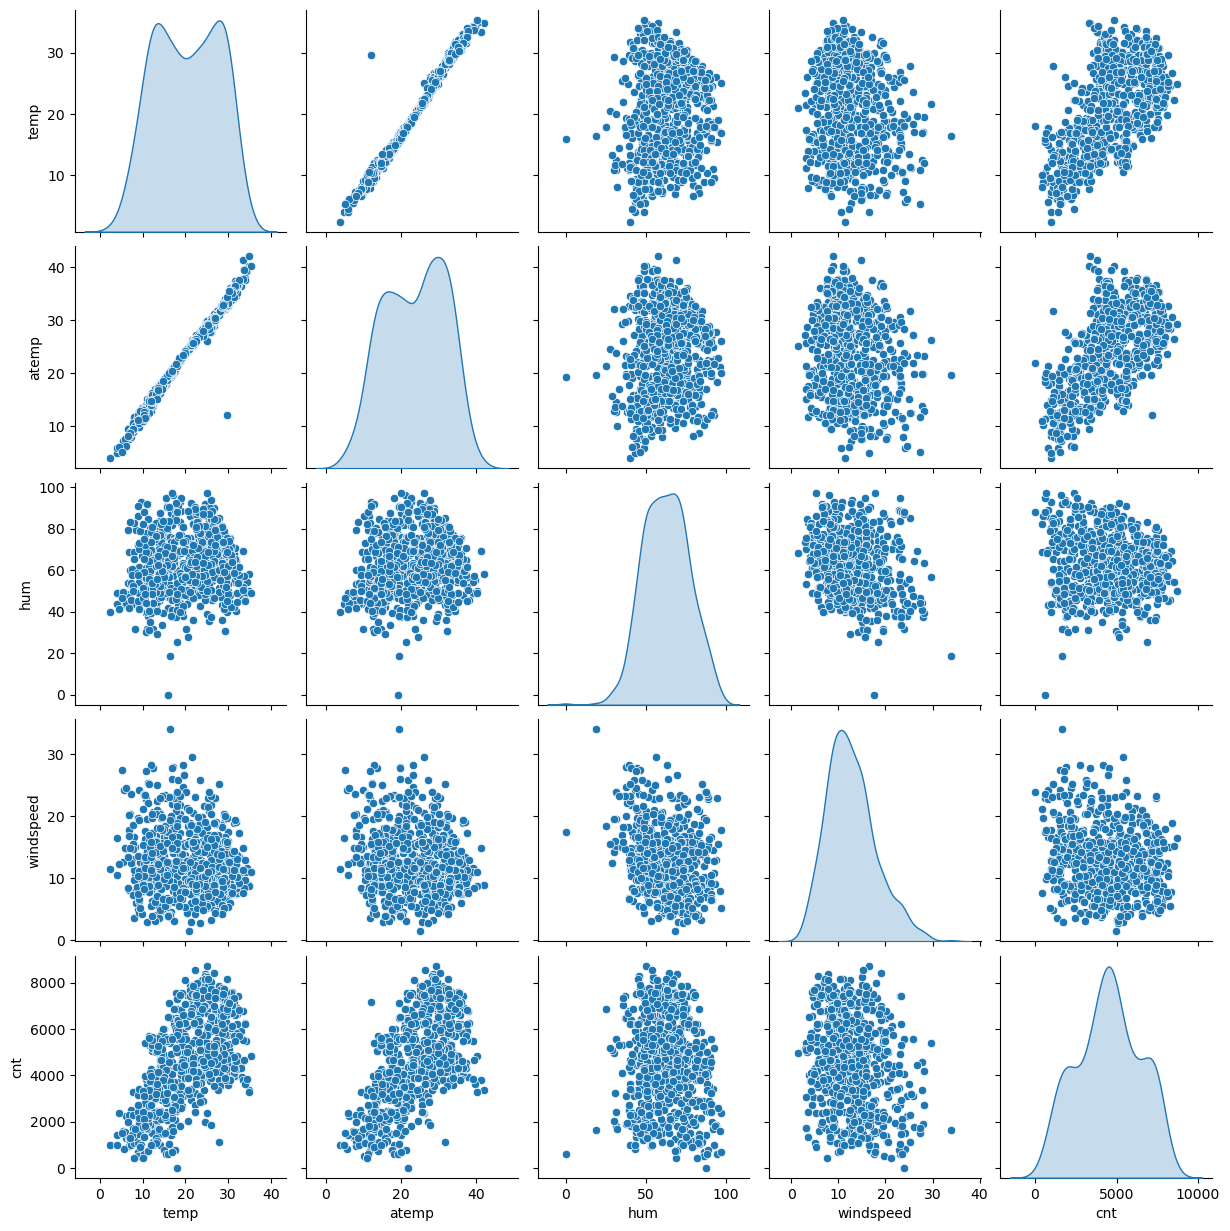

In [31]:
sns.pairplot(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']], diag_kind='kde')
plt.show()

In [32]:
# One-hot encoding categorical variables
df = pd.get_dummies(df, drop_first=True)


In [33]:
# Splitting data into train (80%) and test (20%)
X = df.drop(columns=['cnt'])
y = df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Model training

In [41]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [43]:
# Predictions
y_pred = model.predict(X_test_scaled)

#### Model Evaluation

In [45]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [47]:
# Print evaluation metrics
print("Model Evaluation Metrics:")
print(f'R-squared: {r2:.4f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Model Evaluation Metrics:
R-squared: 0.8605
Mean Absolute Error: 525.99
Mean Squared Error: 477649.26
Root Mean Squared Error: 691.12


#### Residual Analysis

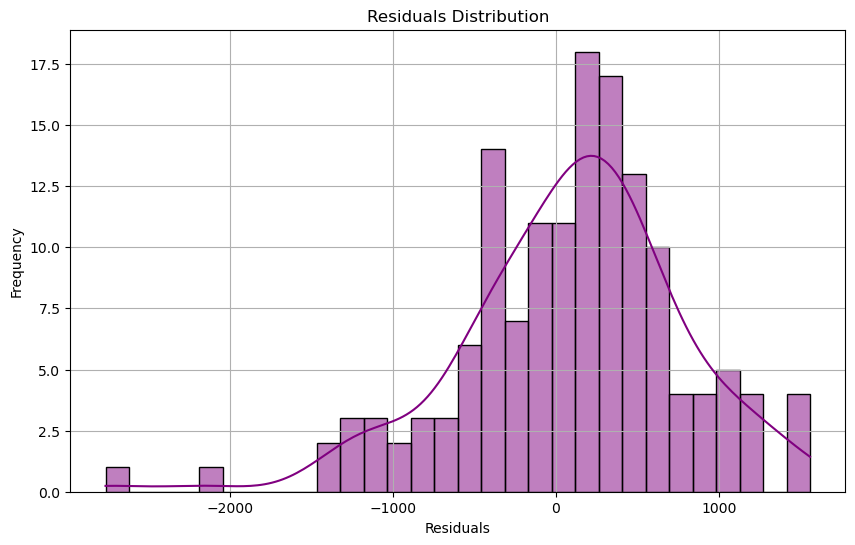

In [49]:
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid()
plt.show()

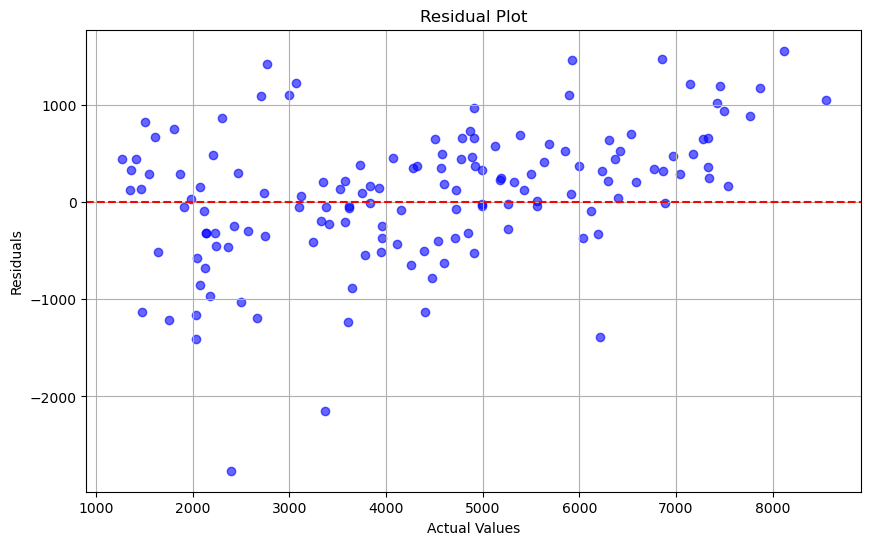

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid()
plt.show()